In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import datetime
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
x_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GOOG_test.csv", index_col = "Date", parse_dates = True)
x_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-10,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
2021-06-11,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
2021-06-14,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500
2021-06-15,2530.439941,2537.239990,2512.969971,2520.659912,2520.659912,1109100
2021-06-16,2524.949951,2530.469971,2482.999023,2513.929932,2513.929932,1315800


In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-06-10 to 2022-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [7]:
x_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,2702.674255,2730.161156,2672.508566,2700.858899,2700.858899,1.303822e+06
std,207.658815,202.614255,208.531935,205.434607,205.434607,5.369361e+05
min,2102.840088,2127.899902,2044.160034,2116.790039,2116.790039,5.933000e+05
25%,2596.669922,2618.074951,2550.070068,2584.800049,2584.800049,9.462000e+05
50%,2742.194092,2767.989990,2714.000000,2740.090088,2740.090088,1.182100e+06
75%,2864.020020,2885.959961,2834.699951,2856.060059,2856.060059,1.512400e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,4.487500e+06


In [8]:
x_train.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
"""Close = []
for col in x_train["Close"]:
  Close.append("".join(col.split(",")))

x_train["Close"] = Close"""

'Close = []\nfor col in x_train["Close"]:\n  Close.append("".join(col.split(",")))\n\nx_train["Close"] = Close'

In [10]:
x_train["Close"] =  x_train["Close"].astype(float)

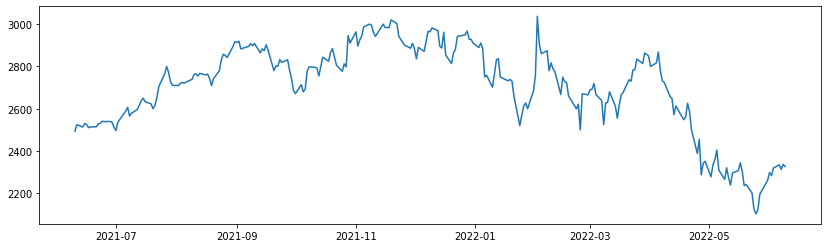

In [11]:
plt.figure(figsize = (14,4))
plt.plot(x_train.index, x_train["Open"])

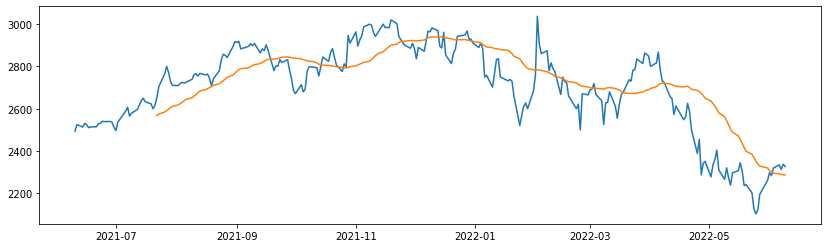

In [12]:
plt.figure(figsize = (14,4))
plt.plot(x_train.index, x_train["Open"])
plt.plot(x_train.index, x_train["Close"].rolling(window = 30).mean())

In [13]:
x_train["Close_30_Days_Mean"] = x_train["Close"].rolling(window = 30).mean()

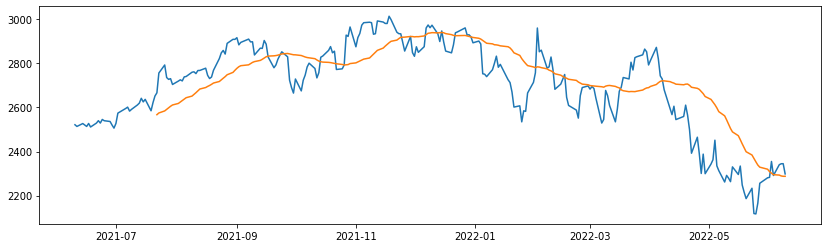

In [14]:
plt.figure(figsize = (14,4))
plt.plot(x_train.index, x_train["Close"])
plt.plot(x_train.index, x_train["Close_30_Days_Mean"])

In [15]:
x_train.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume,Close_30_Days_Mean
Date,,,,,,,
2021-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-18,2516.039969,2531.128557,2498.794155,2519.418562,2519.418562,1.475600e+06,NaN
2021-06-21,2519.009975,2533.625000,2500.034877,2520.489990,2520.489990,1.440043e+06,NaN
2021-06-22,2519.592843,2536.254987,2503.212019,2524.212856,2524.212856,1.409643e+06,NaN


In [16]:
x_train.rolling(window = 30).mean().head(60)

,Open,High,Low,Close,Adj Close,Volume,Close_30_Days_Mean
Date,,,,,,,
2021-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
x_train = x_train["Close"]
x_train = pd.DataFrame(x_train)

In [18]:
x_train.head()

,Close
Date,
2021-06-10,2521.600098
2021-06-11,2513.929932
2021-06-14,2527.040039
2021-06-15,2520.659912
2021-06-16,2513.929932


In [19]:
scaler = MinMaxScaler(feature_range = (0,1))
x_train_scaled = scaler.fit_transform(x_train)

In [20]:
x_train_scaled

array([[0.45109719],
       [0.44255   ],
       [0.45715915],
       [0.4500495 ],
       [0.44255   ],
       [0.45758247],
       [0.43967518],
       [0.45945476],
       [0.47158983],
       [0.45959949],
       [0.47788576],
       [0.47148945],
       [0.46757809],
       [0.44972657],
       [0.43407   ],
       [0.45752697],
       [0.50991197],
       [0.53335778],
       [0.54018885],
       [0.52011952],
       [0.52897849],
       [0.55103138],
       [0.56062572],
       [0.58487383],
       [0.56668795],
       [0.57959186],
       [0.52183565],
       [0.56301056],
       [0.59641854],
       [0.61264344],
       [0.71265571],
       [0.75340703],
       [0.68993411],
       [0.68068501],
       [0.68422881],
       [0.65482115],
       [0.67194873],
       [0.67842313],
       [0.67281795],
       [0.6931324 ],
       [0.69527185],
       [0.71680103],
       [0.71890702],
       [0.70983639],
       [0.72543719],
       [0.72580501],
       [0.73717125],
       [0.701

In [21]:
x_train_scaled.shape

(253, 1)

In [23]:
x_train_scaled_final = []
y_train_scaled_final = []
for i in range(30,253):
  x_train_scaled_final.append(x_train_scaled[i-30:i,0])
  y_train_scaled_final.append(x_train_scaled[i,0])

x_train_scaled = np.array(x_train_scaled_final)
y_train_scaled = np.array(y_train_scaled_final)

In [24]:
x_train_scaled.shape

(223, 30)

In [25]:
x_train_scaled = x_train_scaled.reshape(223,30,1)

In [26]:
x_train_scaled.shape

(223, 30, 1)

In [27]:
y_train_scaled.shape

(223,)

In [28]:
model = Sequential()

In [29]:
model.add(LSTM(units = 400, return_sequences = True, input_shape = (x_train_scaled.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 300, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [30]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(x_train_scaled, y_train_scaled, epochs = 20, batch_size = 30)

Epoch 1/20
8/8 [==============================] - 13s 458ms/step - loss: 0.2614
Epoch 2/20
8/8 [==============================] - 4s 459ms/step - loss: 0.0609
Epoch 3/20
8/8 [==============================] - 6s 707ms/step - loss: 0.0539
Epoch 4/20
8/8 [==============================] - 4s 446ms/step - loss: 0.0364
Epoch 5/20
8/8 [==============================] - 6s 762ms/step - loss: 0.0296
Epoch 6/20
8/8 [==============================] - 5s 594ms/step - loss: 0.0288
Epoch 7/20
8/8 [==============================] - 6s 759ms/step - loss: 0.0293
Epoch 8/20
8/8 [==============================] - 4s 451ms/step - loss: 0.0264
Epoch 9/20
8/8 [==============================] - 4s 462ms/step - loss: 0.0216
Epoch 10/20
8/8 [==============================] - 4s 538ms/step - loss: 0.0221
Epoch 11/20
8/8 [==============================] - 5s 648ms/step - loss: 0.0175
Epoch 12/20
8/8 [==============================] - 4s 458ms/step - loss: 0.0202
Epoch 13/20
8/8 [==============================]

In [32]:
x_train = pd.DataFrame(x_train)

In [34]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GOOG_test.csv", index_col = "Date", parse_dates = True)
test_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-10,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
2021-06-11,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
2021-06-14,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500
2021-06-15,2530.439941,2537.239990,2512.969971,2520.659912,2520.659912,1109100
2021-06-16,2524.949951,2530.469971,2482.999023,2513.929932,2513.929932,1315800


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-06-10 to 2022-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [36]:
real_stock_price = pd.DataFrame(test_df["Close"])

In [37]:
real_stock_price

,Close
Date,
2021-06-10,2521.600098
2021-06-11,2513.929932
2021-06-14,2527.040039
2021-06-15,2520.659912
2021-06-16,2513.929932
...,...
2022-06-03,2291.280029
2022-06-06,2340.209961
2022-06-07,2344.590088


In [38]:
test_df = pd.DataFrame(test_df["Close"])

In [40]:
test_df

,Close
Date,
2021-06-10,2521.600098
2021-06-11,2513.929932
2021-06-14,2527.040039
2021-06-15,2520.659912
2021-06-16,2513.929932
...,...
2022-06-03,2291.280029
2022-06-06,2340.209961
2022-06-07,2344.590088


In [41]:
data_set_total = pd.concat((x_train, test_df), axis = 0)
inputs = data_set_total[len(data_set_total) - len(test_df) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(30,283):
  x_test.append(inputs[i - 30: i, 0])

x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [42]:
predicted_stock_price = pd.DataFrame(predicted_stock_price, index = test_df.index)

In [43]:
predicted_stock_price

,0
Date,
2021-06-10,2297.510010
2021-06-11,2322.141113
2021-06-14,2349.758545
2021-06-15,2380.278809
2021-06-16,2413.150879
...,...
2022-06-03,2221.927490
2022-06-06,2225.621094
2022-06-07,2236.696777


In [45]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

103.05895534859177

In [47]:
from sklearn.metrics import r2_score
r2_score(real_stock_price, predicted_stock_price)

0.7473354908253524

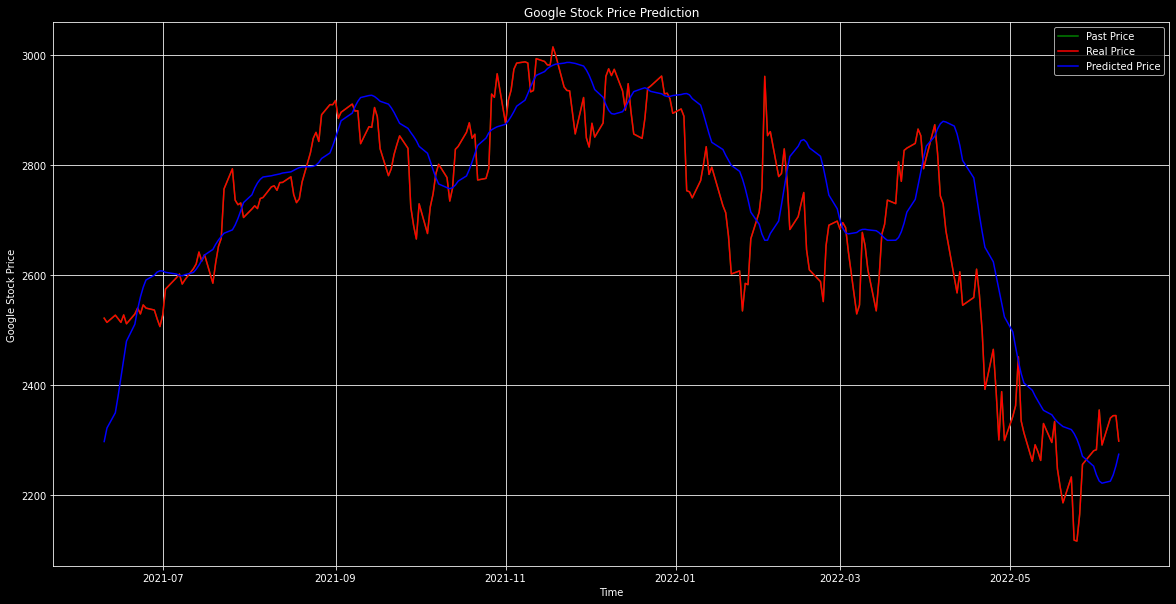

In [48]:
plt.figure(figsize = (20,10))
plt.style.use("dark_background")

plt.plot(x_train, color = 'green', label = 'Past Price')
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.grid()
plt.show()